In [1]:
# Useful starting lines
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2

In [2]:
import os
import scipy.sparse

In [3]:
from proj1_helpers import *
DATA_TRAIN_PATH = os.path.join( os.getcwd(), "..", "data", "train.csv")

y, tX, ids = load_csv_data(DATA_TRAIN_PATH, sub_sample=False)
N_FEATURES=tX.shape[1]
N_SAMPLES=tX.shape[0]
print( "loaded training data: %d samples and %d features\n"%(N_SAMPLES, N_FEATURES) )

loaded training data: 250000 samples and 30 features



In [4]:
y_colors = np.array(['b']*N_SAMPLES)
y_colors[y==-1] = 'r'
y += 1.
y *= 0.5
y_vals = np.unique(y)
print(y_vals)
# If I understood correctly, 1 are bosons, i.e. boson events will be colored in blue

[ 0.  1.]


In [5]:
path=os.path.join( os.getcwd(), "..", "data", "y-labels.csv")
np.savetxt(path, y)

In [6]:
feature_names=('DER_mass_MMC' , 'DER_mass_transverse_met_lep' , 'DER_mass_vis' , 'DER_pt_h' , 'DER_deltaeta_jet_jet' , 'DER_mass_jet_jet' , 'DER_prodeta_jet_jet' , 'DER_deltar_tau_lep' , 'DER_pt_tot' , 'DER_sum_pt' , 'DER_pt_ratio_lep_tau' , 'DER_met_phi_centrality' , 'DER_lep_eta_centrality' , 'PRI_tau_pt' , 'PRI_tau_eta' , 'PRI_tau_phi' , 'PRI_lep_pt' , 'PRI_lep_eta' , 'PRI_lep_phi' , 'PRI_met' , 'PRI_met_phi' , 'PRI_met_sumet' , 'PRI_jet_num' , 'PRI_jet_leading_pt' , 'PRI_jet_leading_eta' , 'PRI_jet_leading_phi' , 'PRI_jet_subleading_pt' , 'PRI_jet_subleading_eta' , 'PRI_jet_subleading_phi' , 'PRI_jet_all_pt')

## Plot once

In [ ]:
n_cols_plots=5
n_rows_plots=int(N_FEATURES/n_cols_plots)+1
print ( "plotting a %d x %d matrix" % (n_cols_plots, n_rows_plots))
#n_rows_plots=1
#f, ax_array = plt.subplots(n_rows_plots, n_cols_plots, sharex='col', sharey='row')
f, ax_array = plt.subplots(n_rows_plots, n_cols_plots, figsize=(16, 16 ))

for row in range(n_rows_plots):
    axes = ax_array[row]
    for col in range(n_cols_plots):
        #ax = ax_array[row*n_cols_plots + col]
        if row*n_cols_plots + col < tX.shape[1]:
            ax = axes[col]
            data_to_plot=tX[:,row*n_cols_plots + col]
            ax.scatter(range(N_SAMPLES), data_to_plot, c=y_colors,alpha=0.2)
        
        
#figpath=os.path.join( os.getcwd(), "..", "figures", "scatterplots.pdf")
#plt.savefig(figpath)
#plt.show()

#### Plot a given feature for detailed inspection 

In [ ]:
feat_index_to_plot=4
f, axes = plt.subplots(1,1)
axes.scatter(range(N_SAMPLES), tX[:,feat_index_to_plot], c=y_colors, alpha=0.2)

## Correlation coefficient matrix

In [ ]:
SIGMA = np.corrcoef(tX, rowvar=False)

In [ ]:
plt.imshow(SIGMA)
plt.colorbar()

#### Plot a given feature pair for detailed inspection 

In [ ]:
first_feat_index_to_plot=26
second_feat_index_to_plot=27
f, axes = plt.subplots(1,1)
axes.scatter(tX[:,first_feat_index_to_plot], tX[:,second_feat_index_to_plot], c=y_colors, alpha=0.2)

## Remove NaNs

In [7]:
NaN_indices =  np.where( tX < -900.0 )[0] 
NaN_indices = np.unique(NaN_indices)
print(len(NaN_indices))

181886


In [ ]:
print(tX.shape)
tX_no_NaN = np.delete(tX, NaN_indices, axis=0)
y_no_NaN = np.delete(y, NaN_indices, axis=0)
print(tX.shape)
print(tX_no_NaN.shape)
y_colors = np.delete(y_colors, NaN_indices, axis=0)
N_SAMPLES_ORIG = N_SAMPLES
N_SAMPLES=tX_no_NaN.shape[0]

#### Save data

In [ ]:
path=os.path.join( os.getcwd(), "..", "data", "train-no-NaNs.csv")
np.savetxt(path, tX_no_NaN)
path=os.path.join( os.getcwd(), "..", "data", "y-labels-no-NaNs.csv")
np.savetxt(path, y_no_NaN)

### Replot correlation coefficient

In [ ]:
SIGMA = np.corrcoef(tX_no_NaN, rowvar=False)

In [ ]:
plt.imshow(SIGMA, interpolation='none')
plt.colorbar()
figpath=os.path.join( os.getcwd(), "..", "figures", "corr-coef-matrix.pdf")
plt.savefig(figpath)

In [ ]:
first_feat_index_to_plot=9
second_feat_index_to_plot=21
f, axes = plt.subplots(1,1)
axes.scatter(tX_no_NaN[:,second_feat_index_to_plot], tX_no_NaN[:,first_feat_index_to_plot], c=y_colors, alpha=0.2)
print("Correlation Coefficient: {c}".format(c=SIGMA[first_feat_index_to_plot,second_feat_index_to_plot]))

In [ ]:
first_feat_index_to_plot=9
second_feat_index_to_plot=29
f, axes = plt.subplots(1,1)
axes.scatter(tX_no_NaN[:,second_feat_index_to_plot], tX_no_NaN[:,first_feat_index_to_plot], c=y_colors, alpha=0.2)
print("Correlation Coefficient between {na} and {nb}: {c}".format(
        na=feature_names[first_feat_index_to_plot],
        nb=feature_names[second_feat_index_to_plot],
        c=SIGMA[first_feat_index_to_plot,second_feat_index_to_plot]),
     )

## Remove highly correlated features

In [8]:
to_remove = [9]
tX_rem = np.delete(tX, to_remove, axis=1)
#tX_rem = np.delete(tX_no_NaN, to_remove, axis=1)

## Replot all features

In [ ]:
N_FEATURES = tX.shape[1]
n_cols_plots=5
n_rows_plots=int(N_FEATURES/n_cols_plots)+1
print ( "plotting a %d x %d matrix" % (n_cols_plots, n_rows_plots))
#n_rows_plots=1
#f, ax_array = plt.subplots(n_rows_plots, n_cols_plots, sharex='col', sharey='row')
f, ax_array = plt.subplots(n_rows_plots, n_cols_plots, figsize=(16, 16 ))

for row in range(n_rows_plots):
    axes = ax_array[row]
    for col in range(n_cols_plots):
        #ax = ax_array[row*n_cols_plots + col]
        if row*n_cols_plots + col < tX.shape[1]:
            ax = axes[col]
            data_to_plot=tX[:,row*n_cols_plots + col]
            ax.scatter(range(N_SAMPLES), data_to_plot, c=y_colors,alpha=0.2)
        
        
#figpath=os.path.join( os.getcwd(), "..", "figures", "scatterplots.pdf")
#plt.savefig(figpath)
#plt.show()

## Treat categorical feature

In [9]:
tX_w_dummy = tX_rem
N_SAMPLES = tX_w_dummy.shape[0]
candidate_categorical_features = [21]
# make sure it is categorical
for candidate in candidate_categorical_features:
    print(np.unique(tX_w_dummy[:,candidate]))
    
# only select the features that are really categorical
categorical_features = candidate_categorical_features

[ 0.  1.  2.  3.]


In [10]:
# make a copy
categorical_feature_data = np.array([]).reshape((N_SAMPLES,0))
for cat_feat in categorical_features:
    categorical_feature_data = np.c_[categorical_feature_data, tX_w_dummy[:,cat_feat]]
print(categorical_feature_data.shape)

(250000, 1)


In [11]:
# Remove it from the list of features (temporarily)
for cat_feat in categorical_features:
    tX_w_dummy = np.delete(tX_w_dummy, cat_feat, axis=1)
print(tX_w_dummy.shape)

(250000, 28)


In [12]:
def create_dummy_variables(categorical_dataset):
    """takes a single categorical feature and returns the corresponding matrix of dummy variables (of size n_levels - 1)"""
    levels = np.unique(categorical_dataset)
    num_levels = levels.shape[0]
    levels = np.delete(levels, -1, axis=0)
    num_samples = categorical_dataset.shape[0]
    dummy_features = np.array([]).reshape(num_samples,0)
    for level in levels:
        dummy_tmp = (categorical_dataset == level)
        dummy_tmp = np.array( [int(x) for x in dummy_tmp] )
        dummy_features = np.c_[dummy_features, dummy_tmp ]
    return dummy_features

In [13]:
# Test this out
dummy = create_dummy_variables(categorical_feature_data[:,0])
print(dummy)

[[ 0.  0.  1.]
 [ 0.  1.  0.]
 [ 0.  1.  0.]
 ..., 
 [ 0.  1.  0.]
 [ 1.  0.  0.]
 [ 1.  0.  0.]]


Now `tX_w_dummy` is a partial dataset without categorical variables and without dummy data 

## Add dummy variables to dataset

In [14]:
train_tX = tX_w_dummy
print("creating dummy data for {d} categorical variables".format(d=categorical_feature_data.shape[1]))
print(train_tX.shape)

creating dummy data for 1 categorical variables
(250000, 28)


In [15]:
for index in range(categorical_feature_data.shape[1]):
    train_tX = np.c_[train_tX, create_dummy_variables(categorical_feature_data[:,index])]
print(train_tX.shape)

(250000, 31)


Now `train_tX` is the full dataset containing also dummy variables.

Now we want to save the data

In [16]:
path=os.path.join( os.getcwd(), "..", "data", "training-data-with-dummy-vars-with-NaNs-removed-corr.csv")
np.savetxt(path, train_tX)

## Whiten Data

In [ ]:
# Using SVD (not sure)
#to_whiten = train_tX
#meanX = np.mean(to_whiten, axis=0)
#to_whiten = to_whiten - meanX
#U, s, Vt = np.linalg.svd(to_whiten)
#print(U.shape)
#print(s.shape)
#print(Vt.shape)
#N_WHIT_FEAT=s.shape[0]

In [17]:
# Using PCA
to_whiten = train_tX
meanX = np.mean(to_whiten, axis=0)
to_whiten = to_whiten - meanX
SIGMA = np.cov(to_whiten, rowvar=False)

lambdas, eig_vecs = np.linalg.eig(SIGMA)

In [18]:
whit_tX = np.power(lambdas, -0.5)
print(whit_tX.shape)
whit_tX = np.diag(whit_tX)
print(whit_tX.shape)
print(eig_vecs.shape)
whit_tX = whit_tX.dot(eig_vecs.T)
whit_tX = whit_tX.dot(to_whiten.T)
whit_tX = whit_tX.T
print(whit_tX.shape)

(31,)
(31, 31)
(31, 31)
(250000, 31)


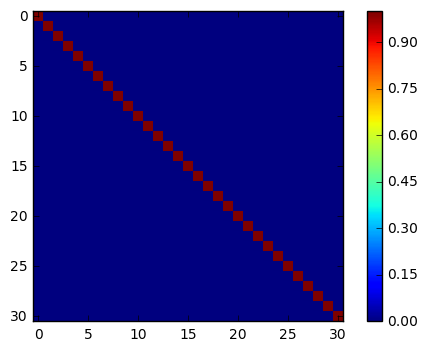

In [19]:
SIGMA = np.corrcoef(whit_tX, rowvar=False)
plt.imshow(SIGMA, interpolation='none')
plt.colorbar()

Now `whit_tX` is the full dataset, whitened and containing dummy variables.

Now we want to save the data

In [21]:
print(whit_tX.shape)
path=os.path.join( os.getcwd(), "..", "data", "training-data-whitened-using-PCA-with-dummy-vars-with-NaNs.csv")
np.savetxt(path, whit_tX)

(250000, 31)


## Standardize Data
looks like whitening, but doesn't touch correlations. The standardized data has mean 0 and variance 1 for any feature, but the correlations between features are preserved.

In [ ]:
std_tX = train_tX
print(std_tX.shape)
meanX = np.mean(std_tX, axis=0)
#print(meanX)
#print(std_tX[0,:])
std_tX = std_tX - meanX
#print(std_tX[0,:])

In [ ]:
stdX = np.std(std_tX, axis=0)
invStdX = 1.0 / stdX
std_tX = np.diag(invStdX).dot(std_tX.T)
std_tX = std_tX.T

In [ ]:
path=os.path.join( os.getcwd(), "..", "data", "training-data-standardized-with-dummy-vars-with-NaNs-removed-corr.csv")
np.savetxt(path, std_tX)

### Replot

In [ ]:
n_cols_plots=4
n_rows_plots=int(N_WHIT_FEAT/n_cols_plots)+1
print ( "plotting a %d x %d matrix" % (n_cols_plots, n_rows_plots))
#n_rows_plots=1
#f, ax_array = plt.subplots(n_rows_plots, n_cols_plots, sharex='col', sharey='row')
f, ax_array = plt.subplots(n_rows_plots, n_cols_plots, figsize=(16, 16 ))

for row in range(n_rows_plots):
    axes = ax_array[row]
    for col in range(n_cols_plots):
        #ax = ax_array[row*n_cols_plots + col]
        if row*n_cols_plots + col < whit_tX.shape[1]:
            ax = axes[col]
            data_to_plot=whit_tX[:,row*n_cols_plots + col]
            ax.scatter(range(N_SAMPLES), data_to_plot, c=y_colors,alpha=0.2)
        
        
#figpath=os.path.join( os.getcwd(), "..", "figures", "scatterplots.pdf")
#plt.savefig(figpath)
#plt.show()

## PCA Analysis (optional)

In [ ]:
PCA_tX = train_tX
N_SAMPLES = PCA_tX.shape[0]
SIGMA = np.cov(PCA_tX, rowvar=False)
print(SIGMA.shape)

In [ ]:
lambdas, eig_vecs = np.linalg.eig(SIGMA)

In [ ]:
plt.plot(range(len(lambdas)), lambdas/np.sum(lambdas), '-*')

In [ ]:
# compute transform matrix
k = 3 # how many components you want to keep
F = eig_vecs[:,0:k]
#print(F.shape)
PCA_tX = PCA_tX.dot(F)
print(PCA_tX.shape)

In [ ]:
path=os.path.join( os.getcwd(), "..", "data", "training-data-pca-with-dummy-vars-with-NaNs.csv")
np.savetxt(path, PCA_tX)

# Additional splitting of data (optional)

I tried playing around with this a bit, but I didn't seem to get any interesting results


## Primitive Features

In [ ]:
primitive_features_indices=[index for index,name in enumerate(feature_names) if name[0:3]=='PRI']
N_PRI_FEAT=len(primitive_features_indices)
N_SAMPLES_ORIG = tX.shape[0]
print("detected %d primitive features"%(N_PRI_FEAT))
#print(primitive_features_indices)
#for index in primitive_features_indices:
#    print(feature_names[index])

In [ ]:
PRI_tX = np.array([]).reshape((N_SAMPLES_ORIG,0))
for index in primitive_features_indices:
    PRI_tX = np.c_[PRI_tX, tX[:,index]]
print(PRI_tX.shape)

In [ ]:
n_cols_plots=4
n_rows_plots=int(N_PRI_FEAT/n_cols_plots)+1
print ( "plotting a %d x %d matrix" % (n_cols_plots, n_rows_plots))
#n_rows_plots=1
#f, ax_array = plt.subplots(n_rows_plots, n_cols_plots, sharex='col', sharey='row')
f, ax_array = plt.subplots(n_rows_plots, n_cols_plots, figsize=(16, 16 ))

for row in range(n_rows_plots):
    axes = ax_array[row]
    for col in range(n_cols_plots):
        #ax = ax_array[row*n_cols_plots + col]
        if row*n_cols_plots + col < PRI_tX.shape[1]:
            ax = axes[col]
            data_to_plot=PRI_tX[:,row*n_cols_plots + col]
            ax.scatter(range(N_SAMPLES_ORIG), data_to_plot, c=y_colors,alpha=0.2, label=feature_names[row*n_cols_plots + col])
        
        
#figpath=os.path.join( os.getcwd(), "..", "figures", "scatterplots.pdf")
#plt.savefig(figpath)
#plt.show()

## Derived features

In [ ]:
der_features_indices=[index for index,name in enumerate(feature_names) if name[0:3]=='DER']
N_DER_FEAT=len(der_features_indices)
print("detected %d primitive features"%(N_DER_FEAT))
#print(primitive_features_indices)
#for index in primitive_features_indices:
#    print(feature_names[index])

In [ ]:
DER_tX = []
for index in der_features_indices:
    DER_tX.append(tX[:,index])
DER_tX = np.array(DER_tX).T.reshape( (N_SAMPLES,N_DER_FEAT) )
#DERnt(DER_tX.shape)
#DERnt(tX[0:3,DERmitive_features_indices[0]])
#DERnt(tX[0:3,DERmitive_features_indices[1]])
#DERnt(DER_tX[0:3,:])

In [ ]:
n_cols_plots=4
n_rows_plots=int(N_DER_FEAT/n_cols_plots)+1
print ( "plotting a %d x %d matrix" % (n_cols_plots, n_rows_plots))
#n_rows_plots=1
#f, ax_array = plt.subplots(n_rows_plots, n_cols_plots, sharex='col', sharey='row')
f, ax_array = plt.subplots(n_rows_plots, n_cols_plots, figsize=(16, 16 ))

for row in range(n_rows_plots):
    axes = ax_array[row]
    for col in range(n_cols_plots):
        #ax = ax_array[row*n_cols_plots + col]
        if row*n_cols_plots + col < DER_tX.shape[1]:
            ax = axes[col]
            data_to_plot=DER_tX[:,row*n_cols_plots + col]
            ax.scatter(range(N_SAMPLES), data_to_plot, c=y_colors,alpha=0.2)
        
        
#figpath=os.path.join( os.getcwd(), "..", "figures", "scatterplots.pdf")
#plt.savefig(figpath)
#plt.show()